In [69]:
!pip install keras==2.3.1
!pip install tensorflow==2.2.0
!pip install protobuf==3.19.6                                                                
!pip install opencv-python==4.4.0.46
!pip install scikit-learn
!pip install matplotlib
!pip install numpy

  Using cached Keras-2.3.1-py2.py3-none-any.whl.metadata (2.2 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl.metadata (1.9 kB)
Using cached Keras-2.3.1-py2.py3-none-any.whl (377 kB)
Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)

   ---------------------------------------- 0/2 [keras-preprocessing]
   ---------------------------------------- 0/2 [keras-preprocessing]
  Attempting uninstall: keras
   ---------------------------------------- 0/2 [keras-preprocessing]
    Found existing installation: keras 3.11.0
   ---------------------------------------- 0/2 [keras-preprocessing]
   -------------------- ------------------- 1/2 [keras]
   -------------------- ------------------- 1/2 [keras]
    Uninstalling keras-3.11.0:
   -------------------- ------------------- 1/2 [keras]
      Successfully uninstalled keras-3.11.0
   -------------------- ------------------- 1/2 [keras]
   -------------------- ------------------- 1/2 [keras]
   ----------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires keras>=3.5.0, but you have keras 2.3.1 which is incompatible.
ERROR: Could not find a version that satisfies the requirement tensorflow==2.2.0 (from versions: 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.1, 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0, 2.20.0rc0)
ERROR: No matching distribution found for tensorflow==2.2.0


  Using cached protobuf-3.19.6-cp310-cp310-win_amd64.whl.metadata (806 bytes)
Using cached protobuf-3.19.6-cp310-cp310-win_amd64.whl (895 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.47.0 requires protobuf<7,>=3.20, but you have protobuf 3.19.6 which is incompatible.
tensorflow 2.19.0 requires keras>=3.5.0, but you have keras 2.3.1 which is incompatible.
tensorflow 2.19.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.3, but you have protobuf 3.19.6 which is incompatible.


     ---------------------------------------- 0.0/88.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/88.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/88.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/88.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/88.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/88.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/88.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/88.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/88.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/88.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/88.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/88.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/88.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/88.9 MB ? eta 

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\koora\\AppData\\Local\\Temp\\pip-unpack-jh5wknlt\\opencv-python-4.4.0.46.tar.gz'
Consider using the `--user` option or check the permissions.



In [71]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [72]:
from keras.utils.np_utils import to_categorical
from keras.layers import MaxPooling2D
from keras.layers import Dense,Dropout,Activation,Flatten
from keras.layers import Convolution2D
from keras.models import Sequential
from keras.models import model_from_json

In [73]:
IMG_SIZE=128

In [74]:
import os

In [75]:
def loaddataset(basepath):
  X,Y=[],[]
  for label, folder in enumerate(['no','yes']):
    folder_path=os.path.join(basepath,folder)
    for file in os.listdir(folder_path):
      path=os.path.join(folder_path,file)
      print(path)
      img=cv2.imread(path,0)
      if img is None:
        continue
      #img=cv2.resize(img,IMG_SIZE,IMG_SIZE)
      #img=cv2.reshape(img,IMG_SIZE,IMG_SIZE,1)
      img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
      img = img.reshape(IMG_SIZE, IMG_SIZE, 1)

      X.append(img)
      Y.append(label)
  return np.array(X), np.array(Y)

In [40]:
#sr="dataset"
#
#
sr="C://Users//koora//OneDrive//Desktop//project2//dataset"
X,Y = loaddataset(sr)

C://Users//koora//OneDrive//Desktop//project2//dataset\no\1 no.jpeg
C://Users//koora//OneDrive//Desktop//project2//dataset\no\10 no.jpg
C://Users//koora//OneDrive//Desktop//project2//dataset\no\11 no.jpg
C://Users//koora//OneDrive//Desktop//project2//dataset\no\12 no.jpg
C://Users//koora//OneDrive//Desktop//project2//dataset\no\13 no.jpg
C://Users//koora//OneDrive//Desktop//project2//dataset\no\14 no.jpg
C://Users//koora//OneDrive//Desktop//project2//dataset\no\15 no.jpg
C://Users//koora//OneDrive//Desktop//project2//dataset\no\17 no.jpg
C://Users//koora//OneDrive//Desktop//project2//dataset\no\18 no.jpg
C://Users//koora//OneDrive//Desktop//project2//dataset\no\19 no.jpg
C://Users//koora//OneDrive//Desktop//project2//dataset\no\2 no.jpeg
C://Users//koora//OneDrive//Desktop//project2//dataset\no\20 no.jpg
C://Users//koora//OneDrive//Desktop//project2//dataset\no\21 no.jpg
C://Users//koora//OneDrive//Desktop//project2//dataset\no\22 no.jpg
C://Users//koora//OneDrive//Desktop//project2//d

In [76]:
#X = X.astype("float")/255.0
#Y = to_categorical(Y)
#X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Load dataset
(X, Y), (X_val, Y_val) = mnist.load_data()

# Reshape to (samples, 28, 28, 1) for CNN
X = X.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)

# Combine train + validation
X = np.concatenate([X, X_val])
Y = np.concatenate([Y, Y_val])

# Normalize
X = X.astype("float32") / 255.0

# One-hot encode labels
Y = to_categorical(Y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [77]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(128, 128, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

c:\Users\koora\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [78]:
import pickle

In [79]:
model.compile(optimizer='adam', 
             loss='categorical_crossentropy', 
             metrics=['accuracy'])
model.summary()
hist = model.fit(X_train, y_train, batch_size=16, epochs=10, validation_split=0.2, shuffle=True, verbose=2)
os.makedirs('Model', exist_ok=True)
model.save_weights('Model/model.weights.h5')









Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 61, 61, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 28800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     3,686,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,354 (14.10 MB)

 Trainable params: 3,696,354 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_12" is incompatible with the layer: expected axis -1 of input shape to have value 28800, but received input with shape (16, 800)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(16, 28, 28, 1), dtype=float32)
  • training=True
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [25]:
import pickle

In [80]:
model_json = model.to_json()
with open("Model/model.json","w")  as json_file:
    json_file.write(model_json)

f=open("Model/histoy.pckl","wb")
pickle.dump(hist.history, f)
f.close()

In [81]:
print(X_test.shape)
print(y_test.shape)
y_test = y_test[:len(X_test)]
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Loss:", loss)
print("Accuracy:", accuracy)


(14000, 28, 28, 1)
(14000, 10)


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_12" is incompatible with the layer: expected axis -1 of input shape to have value 28800, but received input with shape (None, 800)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 28, 28, 1), dtype=float32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>

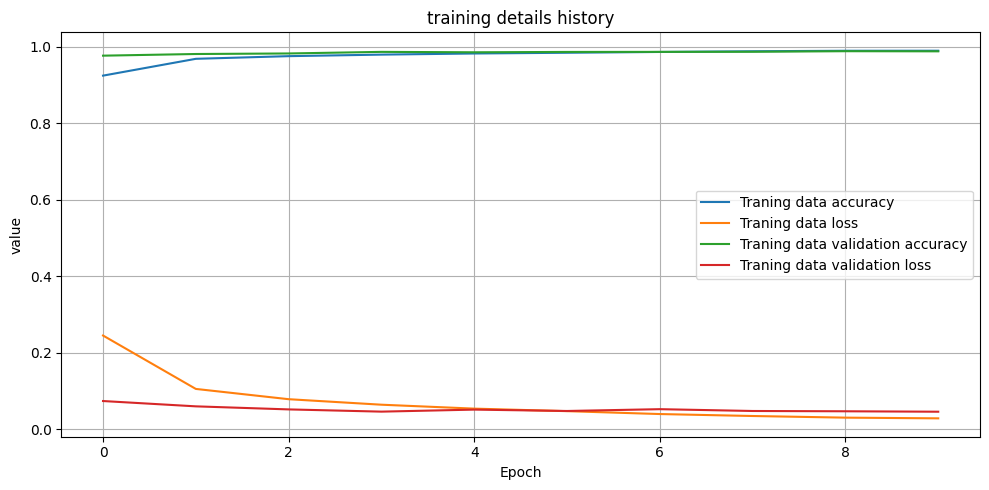

In [29]:
#call matplotlib graphs to draw accuracy performance value
acc=hist.history['accuracy']
los=hist.history['loss']

val_acc=hist.history['val_accuracy']
val_los=hist.history['val_loss']

import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(acc,label="Traning data accuracy")
plt.plot(los,label="Traning data loss")
plt.plot(val_acc,label="Traning data validation accuracy")
plt.plot(val_los,label="Traning data validation loss")

#x and y axis.
plt.xlabel('Epoch')
plt.ylabel('value')

plt.title('training details history')
#which call the matplotlib
plt.legend()
plt.grid(True)
#structure of the frame
plt.tight_layout()
plt.show()

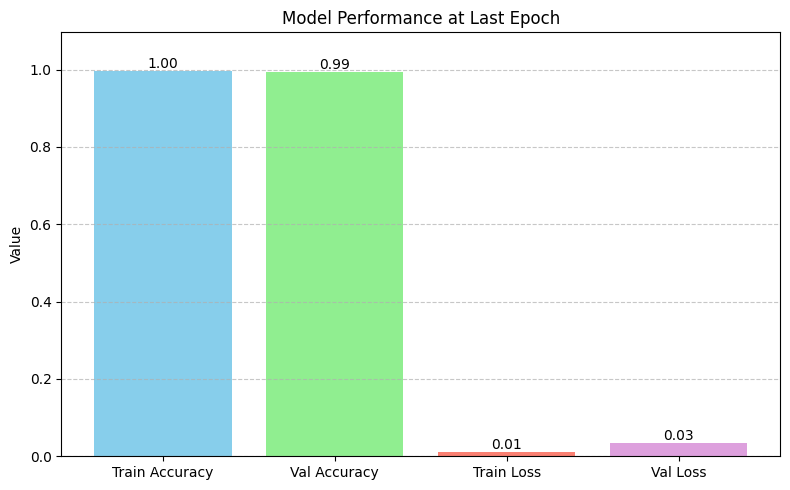

In [82]:
import matplotlib.pyplot as plt

# Get the last epoch's metrics
last_acc = hist.history['accuracy'][-1]
last_val_acc = hist.history['val_accuracy'][-1]
last_loss = hist.history['loss'][-1]
last_val_loss = hist.history['val_loss'][-1]

# Labels and values for the bar chart
labels = ['Train Accuracy', 'Val Accuracy', 'Train Loss', 'Val Loss']
values = [last_acc, last_val_acc, last_loss, last_val_loss]
colors = ['skyblue', 'lightgreen', 'salmon', 'plum']

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=colors)

# Annotate bars with values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}',
             ha='center', va='bottom', fontsize=10)

# Titles and labels
plt.title('Model Performance at Last Epoch')
plt.ylabel('Value')
plt.ylim(0, max(values) + 0.1)  # Adjust Y-axis if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

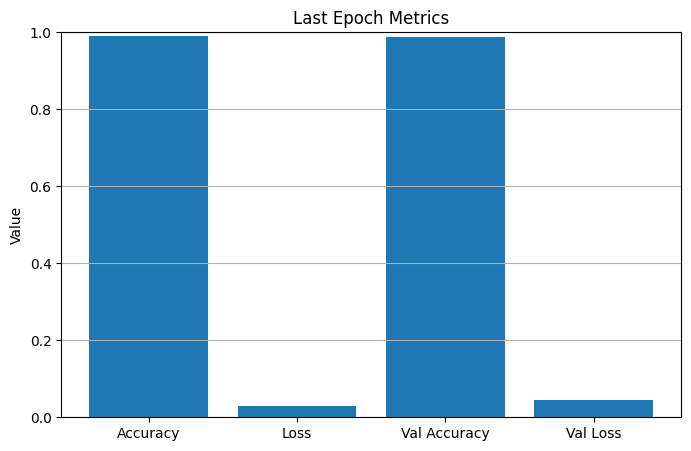

In [31]:
last_values=[acc[-1],los[-1],val_acc[-1],val_los[-1]]
labels=['Accuracy','Loss','Val Accuracy','Val Loss']

plt.figure(figsize=(8,5))
plt.bar(labels,last_values)
plt.title('Last Epoch Metrics')
plt.ylabel('Value')
plt.ylim(0,1)
plt.grid(axis='y')
plt.show()

In [83]:
import cv2
import numpy as np
from keras.models import model_from_json


In [84]:
jsonmodels=open('Model/model.json','r')
loaddata=jsonmodels.read()
jsonmodels.close()

model=model_from_json(loaddata)
import os
print(os.path.exists("Model/model_weights.h5"))

print("[INFO] Loaded model from disk.")

False
[INFO] Loaded model from disk.


In [85]:
disease=['No tumor detected','tumor detected']

filename="C://Users//koora//OneDrive//Desktop//project2//dataset//no//1 no.jpeg"
#img=cv2.imread(filename,0)
img = cv2.imread(filename, 0)
img = cv2.resize(img, (128,128))
img=img.reshape(1,128,128,1)
img=img.astype('float32') / 255.0



In [86]:
#predicts = model.predict(img)
#cls=np.argmax(predicts)
#print(f"[INFO] Prediction Probabilities: {predicts}")
#print(f"[INFO] Classified as :{disease[cls]}")
print(model.input_shape)
img = cv2.imread(filename)  # removes the "0" to read in color
img = cv2.resize(img, (128,128))
img = img.reshape(1,128,128,3)   # 3 channels for RGB
img = img.astype('float32') / 255.0
img = cv2.imread(filename, 0)  # grayscale
img = cv2.resize(img, (128,128))
img = img.reshape(1,128,128,1)
img = img.astype('float32') / 255.0
print(model.input_shape)

(None, 128, 128, 1)
(None, 128, 128, 1)
